In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine
import json

#### Configuración de tema matplotlib

In [68]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
pd.set_option('display.max_columns', None)

#### Conexión a base de datos

In [69]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}")

### Consultas a base de datos

In [70]:
start_date = '2024-12-01 00:00:00'
end_date = '2025-12-31 23:59:59'

In [71]:
sql_transactions = f'''

SELECT 
    bikeAccountNumber,
    initializationDateTime,
    processingDateTime,
    completionDateTime,
    merchantTxId,
    amount,
    authorizationNumber,
    paymentType_id,
    paymentBusinessContext_id,
    paymentMode_id,
    paymentResult_id,
    paymentResultReason_id,
    paymentSourceType_id,
    bikeAccountType_id,
    creditCardType_id,
    creditCardId,
    cardBin,
    cardBinBrand,
    cardBinCountry,
    cardBinSubType,
    cardBinType,
    cardBinResult_id,
    reasonCode
FROM BikePaymentFact
WHERE 
	creationDateTime BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_transactions = pd.read_sql(sql_transactions, engine)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238.0,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914.0,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [72]:
sql_PaymentTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentTypeDim

'''

df_sql_PaymentTypeDim = pd.read_sql(sql_PaymentTypeDim, engine)

df_sql_PaymentTypeDim.head()

,id,localizedValue0
0,0,Purchase
1,1,Pre-authorization
2,2,Completion
3,3,Refund
4,4,Refund (ind.)


In [73]:
sql_PaymentBusinessContextDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentBusinessContextDim

'''

df_sql_PaymentBusinessContextDim = pd.read_sql(sql_PaymentBusinessContextDim, engine)
df_sql_PaymentBusinessContextDim.head()

,id,localizedValue0
0,0,-
1,2000,Bike
2,2001,Migrated Payments
3,2002,Bike // Credit card validation
4,2003,Bike // Processing credit card validation pre-...


In [74]:
sql_PaymentModeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentModeDim

'''

df_sql_PaymentModeDim = pd.read_sql(sql_PaymentModeDim, engine)
df_sql_PaymentModeDim.head()

,id,localizedValue0
0,4798412,External
1,5646456,Cash
2,6565426,Electronic
3,6565653,Credit card
4,8308550,Mobile


In [75]:
sql_PaymentResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultDim

'''

df_sql_PaymentResultDim = pd.read_sql(sql_PaymentResultDim, engine)
df_sql_PaymentResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Accepted
2,2,Refused
3,3,Incomplete
4,4,Cancelled


In [76]:
sql_PaymentResultReasonDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultReasonDim

'''

df_sql_PaymentResultReasonDim = pd.read_sql(sql_PaymentResultReasonDim, engine)
df_sql_PaymentResultReasonDim.head()

,id,localizedValue0
0,23423,See response code
1,75445,Credit card expired
2,88923,View error code
3,104583,AVS mismatch
4,159489,Credit card deleted error


In [77]:
sql_PaymentSourceTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentSourceTypeDim

'''

df_sql_PaymentSourceTypeDim = pd.read_sql(sql_PaymentSourceTypeDim, engine)
df_sql_PaymentSourceTypeDim.head()

,id,localizedValue0
0,1,Backend payment source
1,2,Console payment source
2,3,PED
3,10,Test payment source
4,30,Bike web service payment source


In [78]:
sql_BikeAccountTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM BikeAccountTypeDim

'''

df_sql_BikeAccountTypeDim = pd.read_sql(sql_BikeAccountTypeDim, engine)
df_sql_BikeAccountTypeDim.head()

,id,localizedValue0
0,-128,Unknown
1,1,Member
2,2,Casual


In [79]:
sql_CreditCardTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_CreditCardTypeDim = pd.read_sql(sql_CreditCardTypeDim, engine)
df_sql_CreditCardTypeDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


In [80]:
sql_PaymentCreditCardBinResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_PaymentCreditCardBinResultDim = pd.read_sql(sql_PaymentCreditCardBinResultDim, engine)
df_sql_PaymentCreditCardBinResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


### Transformaciones

In [81]:
# convertir cardBin a entero sin decimales
df_sql_transactions['cardBin'] = pd.to_numeric(df_sql_transactions['cardBin'], errors='coerce').fillna(0).astype(int)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [82]:
# importar CSV
csv_file_path = '../data/Bin_ECOBICI.csv'
df_bines = pd.read_csv(csv_file_path, encoding='utf-8')
df_bines.head(1)

,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,202022,6,COMPLETO,110030,BAJIO,PRESTAMOS ABCD,ABCD,CRÃDITO,PRIVADA


In [83]:
# Agregar datos de df_bines a df_sql_transactions
df_merged = pd.merge(df_sql_transactions, df_bines, how='left', left_on='cardBin', right_on='BIN')
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


In [84]:
# Formatos de fecha
df_merged['initializationDateTime'] = pd.to_datetime(df_merged['initializationDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['processingDateTime'] = pd.to_datetime(df_merged['processingDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['completionDateTime'] = pd.to_datetime(df_merged['completionDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged.head(1)


,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


#### PaymentTypeDim
Contains information pertaining to the type of transaction.

In [85]:
df_merged['tipo_pago'] = df_merged.merge(df_sql_PaymentTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal


#### PaymentBusinessContextDim
Contains information pertaining to the business context of the payment.

In [86]:
df_merged['contexto_negocio_pago'] = df_merged.merge(df_sql_PaymentBusinessContextDim[['id', 'localizedValue0']], how='left', left_on='paymentBusinessContext_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...


#### PaymentModeDim
Contains information pertaining to the payment means

In [87]:
df_merged['modo_pago'] = df_merged.merge(df_sql_PaymentModeDim[['id', 'localizedValue0']], how='left', left_on='paymentMode_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card


#### PaymentResultDim
Contains the result of a payment

In [88]:
df_merged['resultado_pago'] = df_merged.merge(df_sql_PaymentResultDim[['id', 'localizedValue0']], how='left', left_on='paymentResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted


#### PaymentResultReasonDim
Contains the result reason of a payment.

In [89]:
df_merged['razon_rechazo_pago'] = df_merged.merge(df_sql_PaymentResultReasonDim[['id', 'localizedValue0']], how='left', left_on='paymentResultReason_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None


#### PaymentSourceTypeDim
Contains the type of the payment source.

In [90]:
df_merged['fuente_pago'] = df_merged.merge(df_sql_PaymentSourceTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source


#### BikeAccountTypeDim
Contains information pertaining to types of bike accounts.

In [91]:
df_merged['tipo_de_ciclista'] = df_merged.merge(df_sql_BikeAccountTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member


#### CreditCardTypeDim
Contains information pertaining to types of credit cards

In [92]:
df_merged['tipo_de_tarjeta'] = df_merged.merge(df_sql_CreditCardTypeDim[['id', 'localizedValue0']], how='left', left_on='creditCardType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard


#### PaymentCreditCardBinResultDim
Contains the result information pertaining to the credit card BIN (bank identification number). The BIN corresponds to the first 6 digits
of the credit card number.

In [93]:
df_merged['resultado_tarjeta_credito'] = df_merged.merge(df_sql_PaymentCreditCardBinResultDim[['id', 'localizedValue0']], how='left', left_on='cardBinResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [94]:
# Renombrar columnas
df_merged.rename(columns={
    'bikeAccountNumber': 'numero_cuenta_bici',
    'initializationDateTime': 'fecha_hora_inicializacion',
    'processingDateTime': 'fecha_hora_procesamiento',
    'completionDateTime': 'fecha_hora_completacion',
    'merchantTxId': 'id_transaccion_comerciante',
    'amount': 'monto',
    'authorizationNumber': 'numero_autorizacion',
    'creditCardId': 'id_tarjeta_credito',
    'cardBin': 'bin_tarjeta',
    'cardBinBrand': 'marca_bin',
    'cardBinCountry': 'pais_bin',
    'cardBinSubType': 'subtipo_bin',
    'cardBinType': 'tipo_tarjeta',
    'cardBinResult_id': 'id_resultado_bin',
    'reasonCode': 'codigo_razon'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,id_tarjeta_credito,bin_tarjeta,marca_bin,pais_bin,subtipo_bin,tipo_tarjeta,id_resultado_bin,codigo_razon,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [95]:
# Eliminar columnas innecesarias
columns_to_drop = [
    'paymentType_id',
    'paymentBusinessContext_id',
    'paymentMode_id',
    'paymentResult_id',
    'paymentResultReason_id',
    'paymentSourceType_id',
    'bikeAccountType_id',
    'creditCardType_id',
    'marca_bin',
    'BIN',
    'marca_bin',
    'NATURALEZA',
    'id_resultado_bin',
    'MARCA'
]
df_merged.drop(columns=columns_to_drop, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [96]:
# renombrar columnas
df_merged.rename(columns={
    'LONGITUD': 'longitud_bin',
    'RANGO': 'rango_bin',
    'INSTITUCIÃN': 'institucion_bin',
    'ID INSTITUCIÃN': 'id_institucion_bin',
    'PRODUCTO': 'producto_bin',
    'NOMBRE CORTO': 'nombre_corto_bin'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [97]:
# Crear columna pago_exitoso donde codigo_razon es vacio es pago exitoso
df_merged['pago_exitoso'] = np.where(df_merged['codigo_razon'].isnull() | (df_merged['codigo_razon'] == ''), 'Exitoso', 'Fallido')
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso


In [98]:
# Extraer semana de pago de fecha_hora_inicializacion
# Extraer año de pago de fecha_hora_inicializacion
df_merged['numero_semana'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().week
df_merged['numero_ano'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().year
df_merged['numero_día'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().day

df_merged['numero_semana_ano'] = df_merged['numero_semana'].astype(str) + '-' + df_merged['numero_ano'].astype(str)
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,7,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,7,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,7,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,7,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,7,48-2024


In [99]:
df_merged['numero_semana_ano'].unique()

array(['48-2024', '49-2024', '<NA>-<NA>', '50-2024', '51-2024', '52-2024',
       '1-2025', '2-2025', '3-2025', '4-2025', '5-2025', '6-2025',
       '7-2025', '8-2025', '9-2025', '10-2025', '11-2025', '12-2025',
       '13-2025', '14-2025', '15-2025', '16-2025', '17-2025', '18-2025',
       '19-2025', '20-2025', '21-2025', '22-2025', '23-2025', '24-2025',
       '25-2025', '26-2025', '27-2025', '28-2025', '29-2025', '30-2025',
       '31-2025', '32-2025', '33-2025', '34-2025', '35-2025', '36-2025',
       '37-2025', '38-2025', '39-2025', '40-2025', '41-2025', '42-2025',
       '43-2025', '44-2025', '45-2025', '46-2025', '47-2025'],
      dtype=object)

In [100]:
# filtrar donde numero_semana_ano es 
df_filtered_not_na = df_merged[df_merged['numero_semana_ano'] != '<NA>-<NA>']
df_filtered_not_na.head(2)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,7,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,7,48-2024


### Visualizaciones

#### Reintentos por usuario: Gráfico de dispersión (# intentos vs probabilidad de éxito)

In [101]:
# agrupar por numero_cuenta_bici agrupar por pago_exitoso y una columna de total
retries_summary = df_merged.groupby(['numero_cuenta_bici', 'pago_exitoso']).size().unstack(fill_value=0)
retries_summary['total'] = retries_summary.sum(axis=1)
retries_summary.head()

pago_exitoso,Exitoso,Fallido,total
numero_cuenta_bici,,,
100017,5,0,5
100088,1,0,1
10017,3,4,7
100265,2,0,2
100313,5,1,6


In [102]:
retries_summary["probabilidad_exito"] = retries_summary['Exitoso'] / retries_summary['total']
retries_summary.head()

pago_exitoso,Exitoso,Fallido,total,probabilidad_exito
numero_cuenta_bici,,,,
100017,5,0,5,1.000000
100088,1,0,1,1.000000
10017,3,4,7,0.428571
100265,2,0,2,1.000000
100313,5,1,6,0.833333


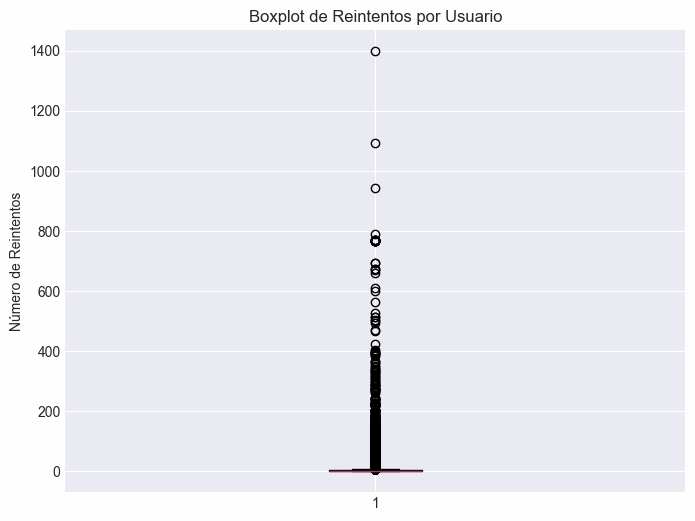

In [103]:
# boxplot de total de reintentos
plt.figure(figsize=(8, 6))
plt.boxplot(retries_summary['total'], vert=True, patch_artist=True)
plt.title('Boxplot de Reintentos por Usuario')
plt.ylabel('Número de Reintentos')
plt.show()

##### Limpieza de outliers

In [104]:
z_scores = stats.zscore(retries_summary['total'])

# Identificando outliers con un umbral de Z-score, por ejemplo, 3
umbral = 3
outliers = retries_summary[(z_scores < -umbral) | (z_scores > umbral)]
# Mostrando outliers identificados
print("Outliers identificados con un umbral de Z-score de 3:")
# print(outliers)
outliers

Outliers identificados con un umbral de Z-score de 3:


pago_exitoso,Exitoso,Fallido,total,probabilidad_exito
numero_cuenta_bici,,,,
22Q5BRDR,0,99,99,0.000000
23XRUFPA,13,45,58,0.224138
2429SP5P,10,101,111,0.090090
243119,69,1,70,0.985714
24JX462H,123,0,123,1.000000
...,...,...,...,...
ZYDRW8MD,51,2,53,0.962264
ZYHCMGTN,24,23,47,0.510638
ZYNQJMBP,7,30,37,0.189189


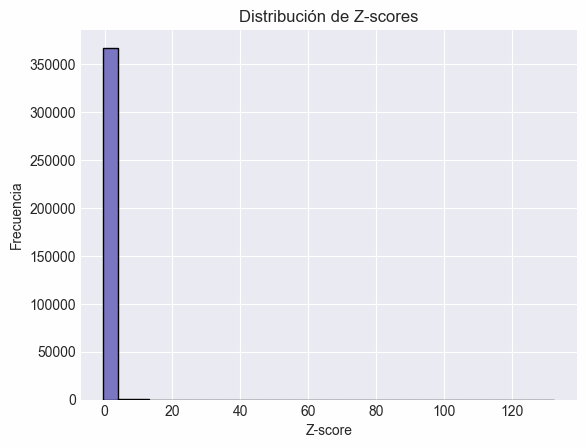

In [105]:
plt.hist(z_scores, bins=30, edgecolor='k')
plt.title('Distribución de Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frecuencia')
plt.show()

In [106]:
# Detectar outliers usando el método IQR
Q1 = retries_summary['total'].quantile(0.25)
Q3 = retries_summary['total'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_sin_outliers = retries_summary[(retries_summary['total'] >= lower_limit) & (retries_summary['total'] <= upper_limit)]

print("Número de outliers detectados:", len(outliers))
print("Número de registros después de remover outliers:", len(df_sin_outliers))

Número de outliers detectados: 2164
Número de registros después de remover outliers: 326612


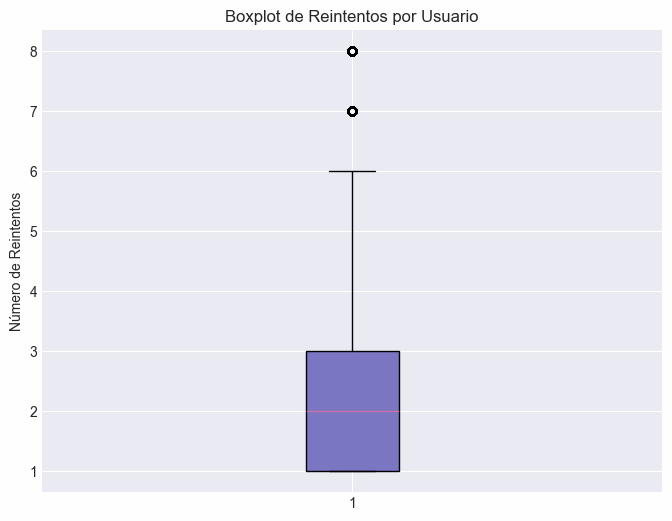

In [107]:
# boxplot de total de reintentos
plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_outliers['total'], vert=True, patch_artist=True)
plt.title('Boxplot de Reintentos por Usuario')
plt.ylabel('Número de Reintentos')
plt.show()

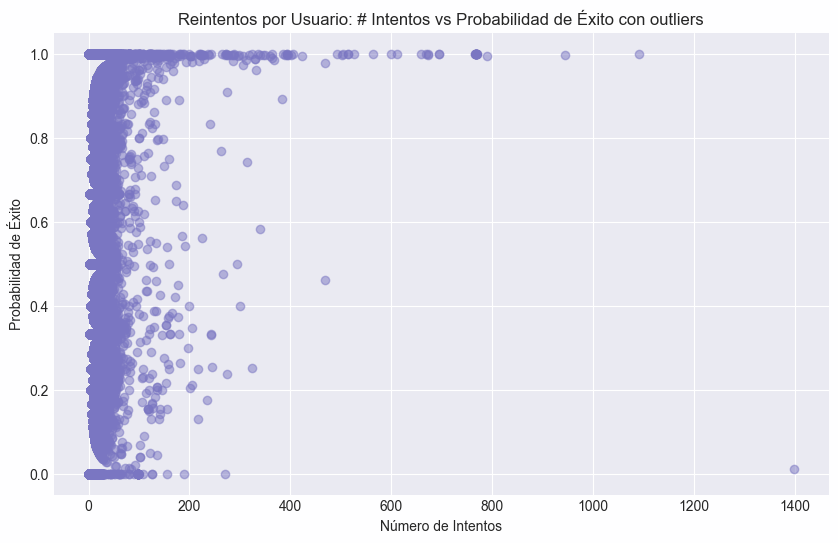

In [108]:
# grafica de dispersión (# intentos vs probabilidad de éxito)
plt.figure(figsize=(10, 6))
plt.scatter(retries_summary['total'], retries_summary['probabilidad_exito'], alpha=0.5)
plt.title('Reintentos por Usuario: # Intentos vs Probabilidad de Éxito con outliers')
plt.xlabel('Número de Intentos')
plt.ylabel('Probabilidad de Éxito')
plt.grid(True)
plt.show()

In [109]:
df_sin_outliers.to_csv('../data/reintentos_por_usuario_sin_outliers.csv', index=True)

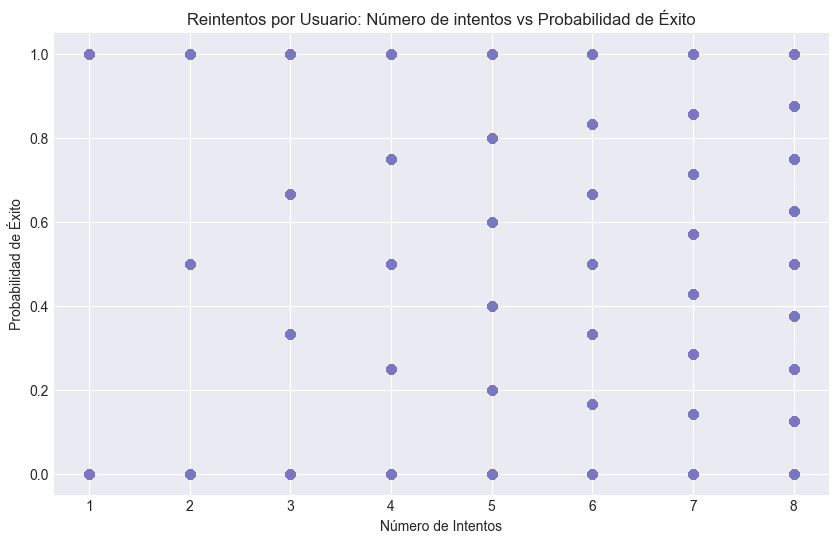

In [110]:
# grafica de dispersión (# intentos vs probabilidad de éxito)
plt.figure(figsize=(10, 6))
plt.scatter(df_sin_outliers['total'], df_sin_outliers['probabilidad_exito'], alpha=0.5)
plt.title('Reintentos por Usuario: Número de intentos vs Probabilidad de Éxito')
plt.xlabel('Número de Intentos')
plt.ylabel('Probabilidad de Éxito')
plt.grid(True)
plt.show()

In [111]:
x = df_sin_outliers['total']
y = df_sin_outliers['probabilidad_exito']
correlation = np.corrcoef(x, y)[0, 1]

print(f'Correlación entre Número de Intentos y Probabilidad de Éxito: {correlation:.2f}')

Correlación entre Número de Intentos y Probabilidad de Éxito: -0.13


In [112]:
# filtrar df_merged hora_dia entre 5 y 12
df_merged['hora_dia'] = df_merged['fecha_hora_inicializacion'].dt.hour
df_filtered_service = df_merged[(df_merged['hora_dia'] >= 5) & (df_merged['hora_dia'] <= 12)]
df_filtered_service.head(2)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano,hora_dia
452,HJKPCWTP,2024-12-01 05:00:00.187000-06:00,2024-12-01 05:00:01.094000-06:00,2024-12-01 05:00:01.094000-06:00,cyb_cnp0006637833,0,None,6275fc5e-997e-40f4-8215-51807030f9de,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,7,48-2024,5.0
453,2XCXYXW3,2024-12-01 05:00:01.188000-06:00,2024-12-01 05:00:01.976000-06:00,2024-12-01 05:00:01.976000-06:00,cyb_cnp0006637834,0,None,107b021e-001b-4f7a-8ce9-cc566516ddd7,526777,RUS,STANDARD,CREDIT,None,6.0,COMPLETO,310104.0,NU MEXICO FINANCIERA,NU BN MEXICO GOLD CARD,NU MX GOLD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,7,48-2024,5.0


C:\Users\victor.briones\AppData\Local\Temp\ipykernel_2700\956320608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_service['dia_semana'] = df_filtered_service['fecha_hora_inicializacion'].dt.day_name()
C:\Users\victor.briones\AppData\Local\Temp\ipykernel_2700\956320608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_service['hora_dia'] = df_filtered_service['fecha_hora_inicializacion'].dt.hour


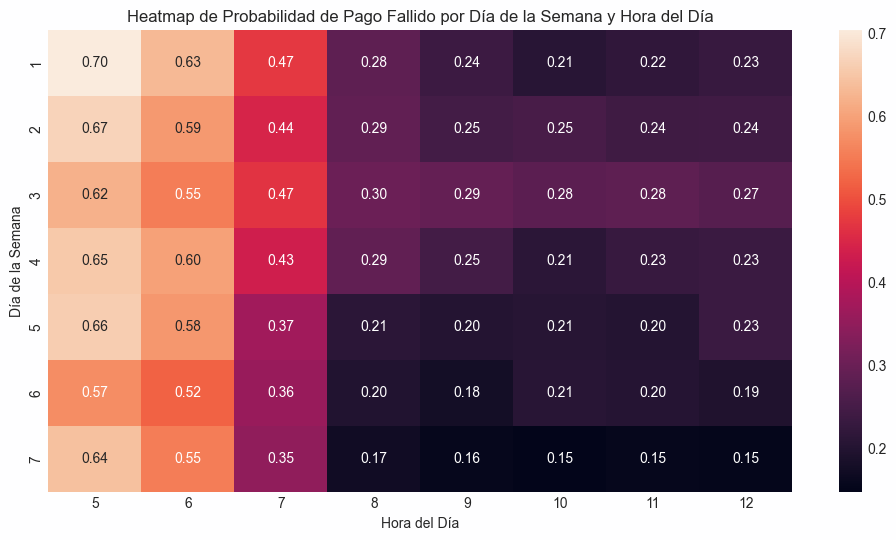

In [113]:
# heatmap dia de la semana vs hora del día con promedio de reintentos
df_filtered_service['dia_semana'] = df_filtered_service['fecha_hora_inicializacion'].dt.day_name()
df_filtered_service['hora_dia'] = df_filtered_service['fecha_hora_inicializacion'].dt.hour
heatmap_data = df_filtered_service.pivot_table(index='numero_día', columns='hora_dia', values='pago_exitoso', aggfunc=lambda x: (x == 'Fallido').mean())
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f")
plt.title('Heatmap de Probabilidad de Pago Fallido por Día de la Semana y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.show()

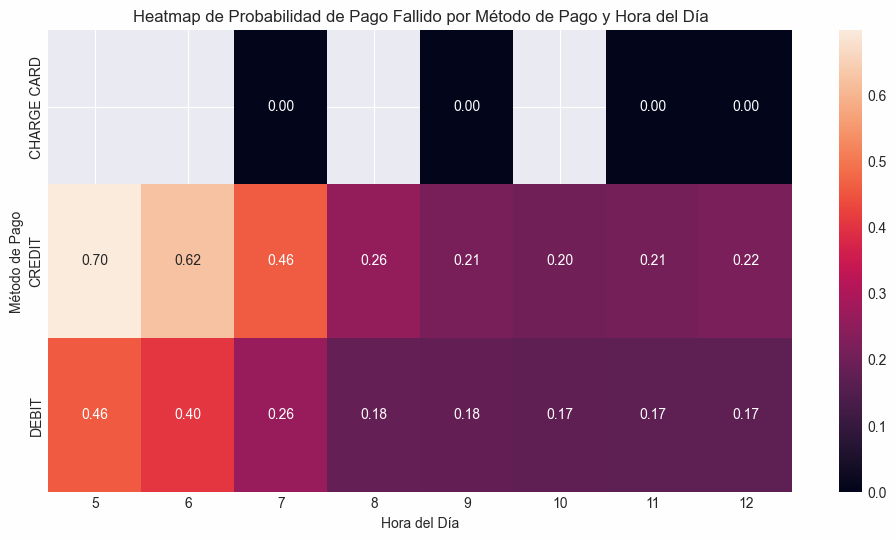

In [114]:
# heatmap  metodo de pago vs hora del día con promedio de reintentos
heatmap_data_metodo = df_filtered_service.pivot_table(index='tipo_tarjeta', columns='hora_dia', values='pago_exitoso', aggfunc=lambda x: (x == 'Fallido').mean())
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_metodo, annot=True, fmt=".2f")
plt.title('Heatmap de Probabilidad de Pago Fallido por Método de Pago y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Método de Pago')
plt.show()

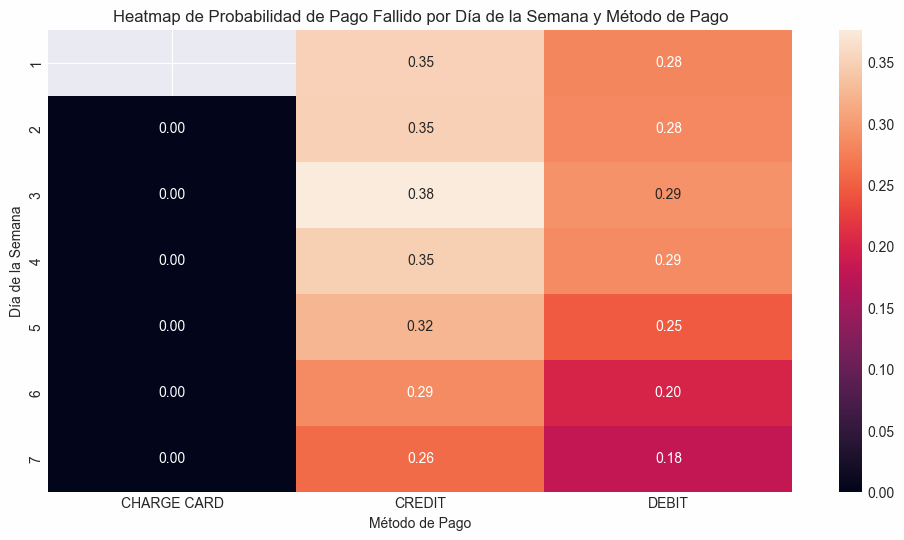

In [115]:
# hatmap dia vs metodo de pago con promedio de reintentos
heatmap_data_dia_metodo = df_merged.pivot_table(index='numero_día', columns='tipo_tarjeta', values='pago_exitoso', aggfunc=lambda x: (x == 'Fallido').mean())
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_dia_metodo, annot=True, fmt=".2f")
plt.title('Heatmap de Probabilidad de Pago Fallido por Día de la Semana y Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Día de la Semana')
plt.show()

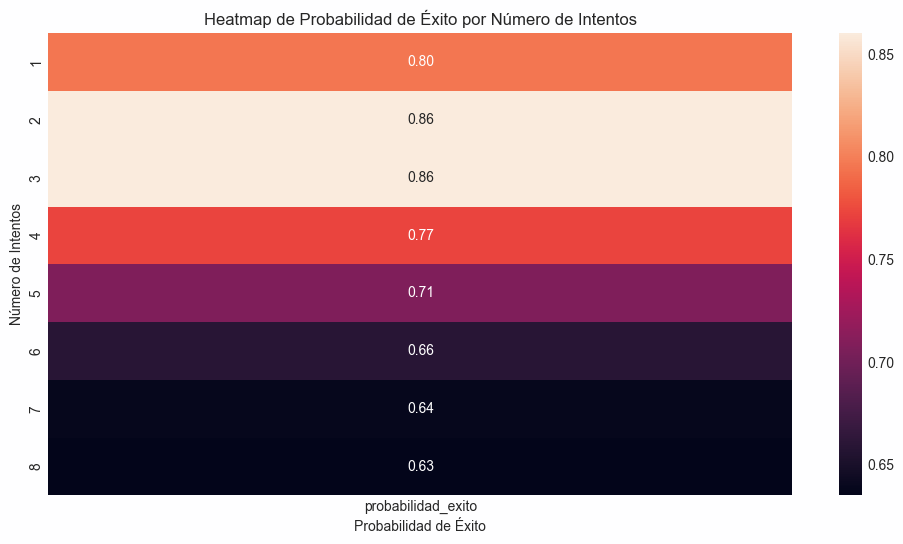

In [116]:
# heatmap numero de intentos vs probabilidad de exito
heatmap_data_intentos = df_sin_outliers.pivot_table(index='total', values='probabilidad_exito', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_intentos, annot=True, fmt=".2f")
plt.title('Heatmap de Probabilidad de Éxito por Número de Intentos')
plt.xlabel('Probabilidad de Éxito')
plt.ylabel('Número de Intentos')
plt.show()

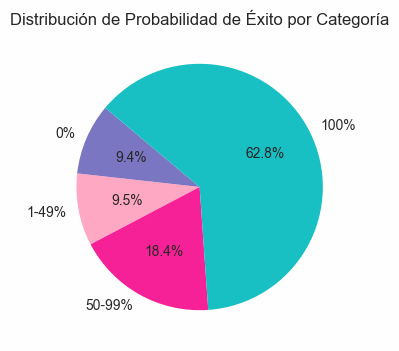

In [117]:
# grafica de pastel por probabilidad de exito agrupado por 100%, 50-99, 1-49 y 0%
bins = [0, 0.01, 0.5, 0.99, 1.01]
labels = ['0%', '1-49%', '50-99%', '100%']  
retries_summary['categoria_probabilidad_exito'] = pd.cut(retries_summary['probabilidad_exito'], bins=bins, labels=labels, right=False)
categoria_counts = retries_summary['categoria_probabilidad_exito'].value_counts().sort_index()
plt.figure(figsize=(4, 4))
plt.pie(categoria_counts, labels=categoria_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Probabilidad de Éxito por Categoría')
plt.show()

In [118]:
# agrupar por numero de intentos

heatmap_data_intentos = df_sin_outliers.pivot_table(index='total', values='probabilidad_exito', aggfunc='mean')
heatmap_data_intentos

pago_exitoso,probabilidad_exito
total,
1,0.795599
2,0.860165
3,0.859330
4,0.772499
5,0.707559
6,0.658818
7,0.638295
8,0.634973


In [119]:
from collections import defaultdict

def etiquetar_intentos(df):
    # Ordenar por usuario y fecha
    df = df.sort_values(['numero_cuenta_bici', 'fecha_hora_inicializacion'])
    
    # Calcular número de intento por usuario
    df['intento_numero'] = df.groupby('numero_cuenta_bici').cumcount() + 1
    
    # Crear etiqueta descriptiva
    def crear_etiqueta(numero):
        if numero == 1:
            return 1
        elif numero == 2:
            return 2
        elif numero == 3:
            return 3
        else:
            return numero
    
    df['etiqueta_intento'] = df['intento_numero'].apply(crear_etiqueta)
    
    return df

df_etiquetado = etiquetar_intentos(df_filtered_not_na)

In [120]:
df_etiquetado['etiqueta_intento'].value_counts()

etiqueta_intento
1       368240
2       226802
3       158919
4       117442
5        91227
         ...  
1394         1
1395         1
1396         1
1397         1
1398         1
Name: count, Length: 1398, dtype: int64

In [121]:
df_etiquetado.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano,intento_numero,etiqueta_intento
1018934,100017,2025-08-01 10:15:38.521000-06:00,2025-08-01 10:15:40.292000-06:00,2025-08-01 10:15:40.292000-06:00,cyb_cnp0007567465,10000,None,b4733b9a-3aa0-4784-8582-41aa87956153,420767,USA,CLASSIC,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization,Bike // Credit card validation,Credit card,Accepted,None,Bike web service payment source,NaN,Visa,Unknown,Exitoso,31,2025,5,31-2025,1,1
1019051,100017,2025-08-01 11:00:05.330000-06:00,2025-08-01 11:00:06.107000-06:00,2025-08-01 11:00:06.107000-06:00,cyb_cnp0007567573,0,None,b4733b9a-3aa0-4784-8582-41aa87956153,420767,USA,CLASSIC,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,31,2025,5,31-2025,2,2
1133060,100017,2025-08-27 13:16:08.441000-06:00,2025-08-27 13:16:09.832000-06:00,2025-08-27 13:16:09.832000-06:00,cyb_cnp0007671437,10000,None,b2775a65-9234-4c16-ab79-02fc07da10f1,480990,USA,PLATINUM,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization,Bike // Credit card validation,Credit card,Accepted,None,Bike web service payment source,NaN,Visa,Unknown,Exitoso,35,2025,3,35-2025,3,3
1133150,100017,2025-08-27 14:00:05.833000-06:00,2025-08-27 14:00:06.707000-06:00,2025-08-27 14:00:06.707000-06:00,cyb_cnp0007671520,0,None,b2775a65-9234-4c16-ab79-02fc07da10f1,480990,USA,PLATINUM,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,35,2025,3,35-2025,4,4
1137191,100017,2025-08-28 23:00:08.594000-06:00,2025-08-28 23:00:10.100000-06:00,2025-08-28 23:00:10.100000-06:00,cyb_cnp0007675245,5660000,None,b2775a65-9234-4c16-ab79-02fc07da10f1,480990,USA,PLATINUM,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Purchase,Bike // Member auto-renew membership purchase,Credit card,Accepted,None,Autorenew upon membership expiry,NaN,Visa,Unknown,Exitoso,35,2025,4,35-2025,5,5


In [122]:
# agregar columna monto real monto/10000
df_etiquetado['monto_real'] = df_etiquetado['monto'] / 10000
df_etiquetado.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano,intento_numero,etiqueta_intento,monto_real
1018934,100017,2025-08-01 10:15:38.521000-06:00,2025-08-01 10:15:40.292000-06:00,2025-08-01 10:15:40.292000-06:00,cyb_cnp0007567465,10000,None,b4733b9a-3aa0-4784-8582-41aa87956153,420767,USA,CLASSIC,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization,Bike // Credit card validation,Credit card,Accepted,None,Bike web service payment source,NaN,Visa,Unknown,Exitoso,31,2025,5,31-2025,1,1,1.0
1019051,100017,2025-08-01 11:00:05.330000-06:00,2025-08-01 11:00:06.107000-06:00,2025-08-01 11:00:06.107000-06:00,cyb_cnp0007567573,0,None,b4733b9a-3aa0-4784-8582-41aa87956153,420767,USA,CLASSIC,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,31,2025,5,31-2025,2,2,0.0
1133060,100017,2025-08-27 13:16:08.441000-06:00,2025-08-27 13:16:09.832000-06:00,2025-08-27 13:16:09.832000-06:00,cyb_cnp0007671437,10000,None,b2775a65-9234-4c16-ab79-02fc07da10f1,480990,USA,PLATINUM,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization,Bike // Credit card validation,Credit card,Accepted,None,Bike web service payment source,NaN,Visa,Unknown,Exitoso,35,2025,3,35-2025,3,3,1.0
1133150,100017,2025-08-27 14:00:05.833000-06:00,2025-08-27 14:00:06.707000-06:00,2025-08-27 14:00:06.707000-06:00,cyb_cnp0007671520,0,None,b2775a65-9234-4c16-ab79-02fc07da10f1,480990,USA,PLATINUM,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,35,2025,3,35-2025,4,4,0.0
1137191,100017,2025-08-28 23:00:08.594000-06:00,2025-08-28 23:00:10.100000-06:00,2025-08-28 23:00:10.100000-06:00,cyb_cnp0007675245,5660000,None,b2775a65-9234-4c16-ab79-02fc07da10f1,480990,USA,PLATINUM,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Purchase,Bike // Member auto-renew membership purchase,Credit card,Accepted,None,Autorenew upon membership expiry,NaN,Visa,Unknown,Exitoso,35,2025,4,35-2025,5,5,566.0


In [123]:
# filtrar por exitosos
df_exitosos = df_etiquetado[df_etiquetado['pago_exitoso'] == 'Exitoso']
df_fallidos = df_etiquetado[df_etiquetado['pago_exitoso'] == 'Fallido']

In [124]:
print("La suma de montos fallidos es:", df_fallidos['monto_real'].sum())
print("Numero de registros fallidos:", len(df_fallidos))
print("La suma de montos exitosos es:", df_exitosos['monto_real'].sum())
print("Numero de registros exitosos:", len(df_exitosos))

La suma de montos fallidos es: 150409897.01
Numero de registros fallidos: 464269
La suma de montos exitosos es: 266952368.25
Numero de registros exitosos: 1090685


In [125]:
df_etiquetado['etiqueta_intento'].describe()

count    1.554954e+06
mean     1.570972e+01
std      6.095434e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      1.398000e+03
Name: etiqueta_intento, dtype: float64

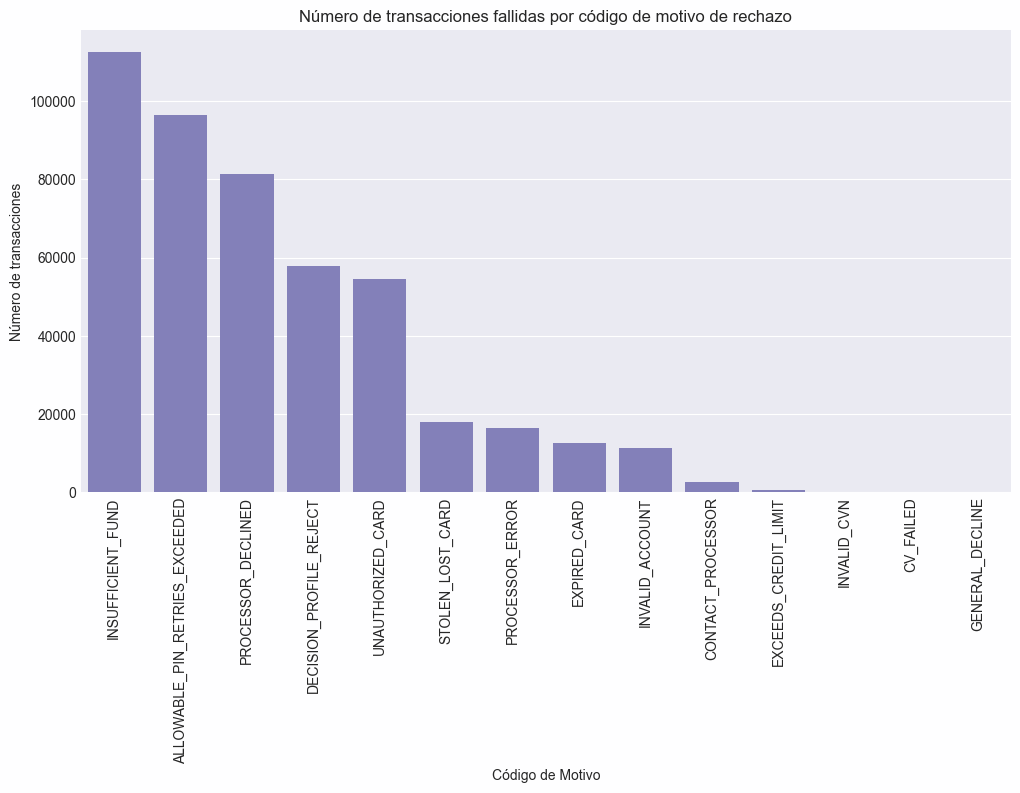

La suma de montos fallidos es: codigo_razon
INSUFFICIENT_FUND                 112560
ALLOWABLE_PIN_RETRIES_EXCEEDED     96385
PROCESSOR_DECLINED                 81404
DECISION_PROFILE_REJECT            57894
UNAUTHORIZED_CARD                  54383
STOLEN_LOST_CARD                   18008
PROCESSOR_ERROR                    16418
EXPIRED_CARD                       12574
INVALID_ACCOUNT                    11353
CONTACT_PROCESSOR                   2566
EXCEEDS_CREDIT_LIMIT                 558
INVALID_CVN                          116
CV_FAILED                             45
GENERAL_DECLINE                        5
Name: count, dtype: int64


In [126]:
# graficar codigo_razon vs numero de intentos
plt.figure(figsize=(12, 6))
sns.countplot(data=df_fallidos, x='codigo_razon', order=df_fallidos['codigo_razon'].value_counts().index)
plt.title('Número de transacciones fallidas por código de motivo de rechazo')
plt.xlabel('Código de Motivo')
# valores de x rotados 45 grados
plt.xticks(rotation=90)
plt.ylabel('Número de transacciones')
plt.show()

print("La suma de montos fallidos es:", df_fallidos['codigo_razon'].value_counts())

- transacciones fallidas
-- Crear arupacion por segmentos 1,2,3,4,5,6,7,8, 9+ y obtener cuales son los codigos de rechazo


In [127]:
# filtrar por etuiqueta_intento 11,2,3,4,5,6,7,8, 9+
df_intento_1 = df_fallidos[df_fallidos['etiqueta_intento'] == 1]
df_intento_2 = df_fallidos[df_fallidos['etiqueta_intento'] == 2]
df_intento_3 = df_fallidos[df_fallidos['etiqueta_intento'] == 3]
df_intento_4 = df_fallidos[df_fallidos['etiqueta_intento'] == 4]
df_intento_5 = df_fallidos[df_fallidos['etiqueta_intento'] == 5]
df_intento_6 = df_fallidos[df_fallidos['etiqueta_intento'] == 6]
df_intento_7 = df_fallidos[df_fallidos['etiqueta_intento'] == 7]
df_intento_8 = df_fallidos[df_fallidos['etiqueta_intento'] == 8]
df_intento_9_mas = df_fallidos[df_fallidos['etiqueta_intento'] >= 9]

# contar  y sumar numero de filas en cada df
print("Número de transacciones fallidas en el intento 1:", len(df_intento_1))
print("Número de transacciones fallidas en el intento 2:", len(df_intento_2))
print("Número de transacciones fallidas en el intento 3:", len(df_intento_3))
print("Número de transacciones fallidas en el intento 4:", len(df_intento_4))
print("Número de transacciones fallidas en el intento 5:", len(df_intento_5))
print("Número de transacciones fallidas en el intento 6:", len(df_intento_6))
print("Número de transacciones fallidas en el intento 7:", len(df_intento_7))
print("Número de transacciones fallidas en el intento 8:", len(df_intento_8))
print("Número de transacciones fallidas en el intento 9 o más:", len(df_intento_9_mas))


print("Total número de transacciones fallidas:", sum([
    len(df_intento_1),
    len(df_intento_2),
    len(df_intento_3),
    len(df_intento_4),
    len(df_intento_5),
    len(df_intento_6),
    len(df_intento_7),
    len(df_intento_8),
    len(df_intento_9_mas)
]))

Número de transacciones fallidas en el intento 1: 94427
Número de transacciones fallidas en el intento 2: 53030
Número de transacciones fallidas en el intento 3: 45887
Número de transacciones fallidas en el intento 4: 38180
Número de transacciones fallidas en el intento 5: 30556
Número de transacciones fallidas en el intento 6: 25417
Número de transacciones fallidas en el intento 7: 21285
Número de transacciones fallidas en el intento 8: 18119
Número de transacciones fallidas en el intento 9 o más: 137368
Total número de transacciones fallidas: 464269


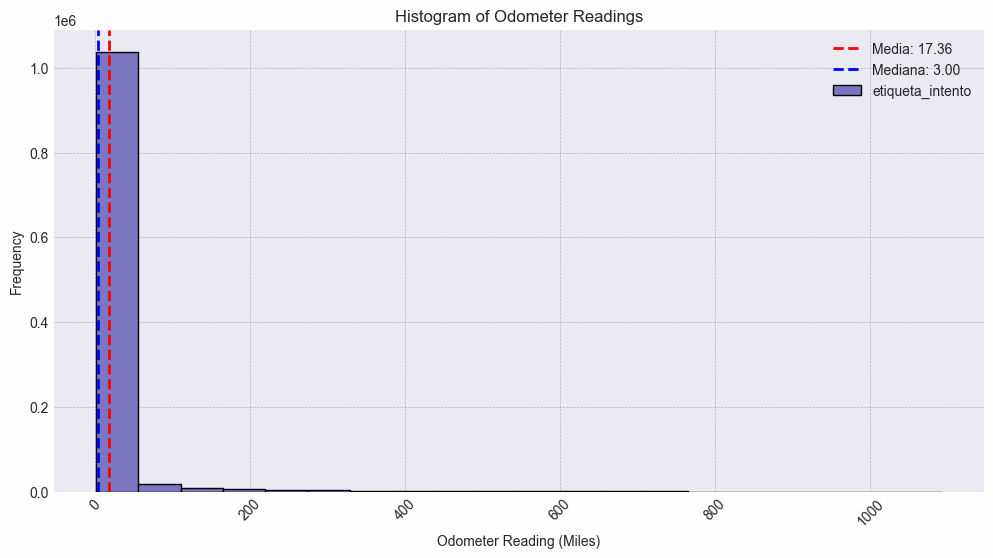

In [128]:
# graficar codigo_razon vs numero de intentos y monto real
data = df_exitosos
media = np.mean(data['etiqueta_intento'])
mediana = np.median(data['etiqueta_intento'])

plt.figure(figsize=(12, 6))
# Añadir líneas verticales para la media y la mediana
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='b', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

data['etiqueta_intento'].plot(
    kind='hist',
    bins=20,
    figsize=(12, 6),
    title='Histogram of Odometer Readings',
    xlabel='Odometer Reading (Miles)',
    ylabel='Frequency',
    edgecolor='black'
)
plt.legend()  # Mostrar la leyenda
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

plt.show()

In [129]:
# filtrar donde etiqueta_intento es <=8
df_exitosos_filtrado = df_exitosos[df_exitosos['etiqueta_intento'] <= 8]
df_fallidos_filtrado = df_fallidos[df_fallidos['etiqueta_intento'] <= 8]

<Figure size 1800x800 with 0 Axes>

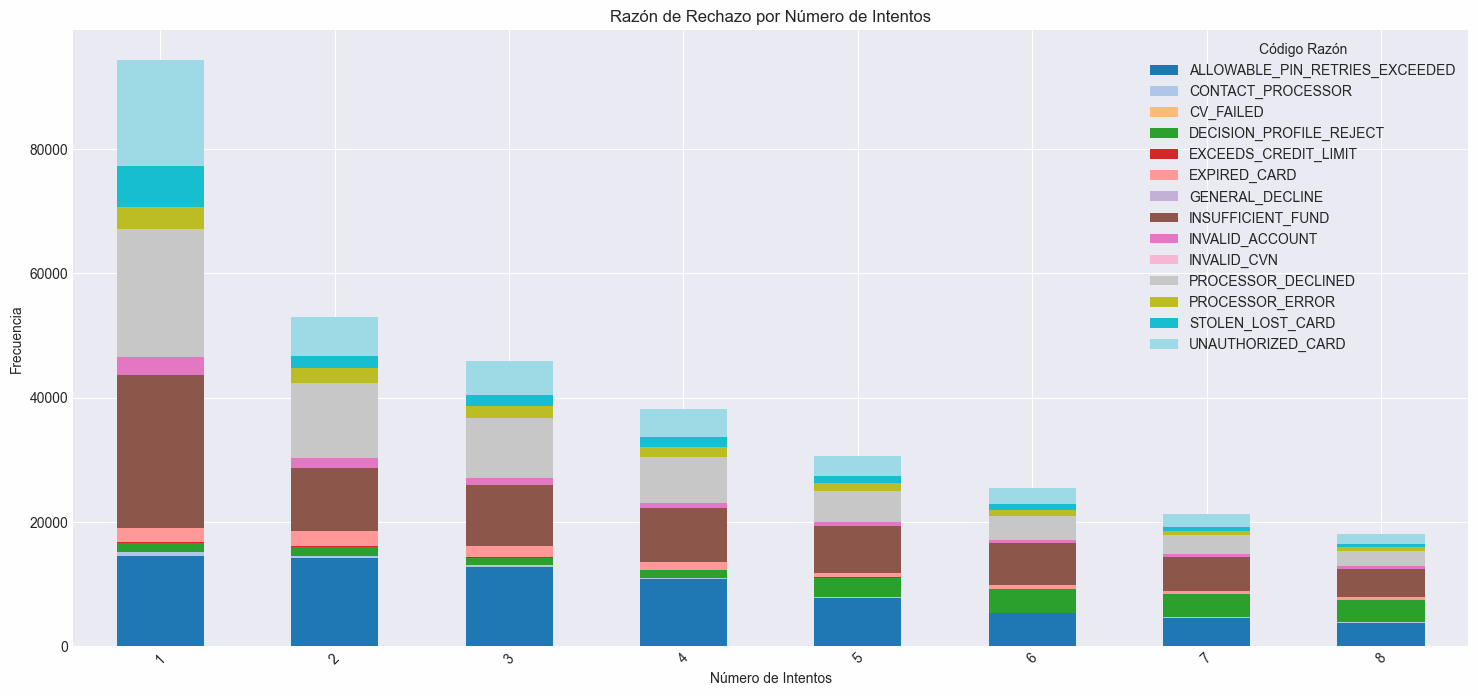

In [130]:
# grafica de barras apiladas razon de rechazo por numero de intentos
data = df_fallidos_filtrado
plt.figure(figsize=(18, 8))
razon_rechazo_por_intentos = data.groupby(['etiqueta_intento', 'codigo_razon']).size().unstack(fill_value=0)
razon_rechazo_por_intentos.plot(kind='bar', stacked=True, figsize=(18, 8), colormap='tab20')
plt.title('Razón de Rechazo por Número de Intentos')
plt.xlabel('Número de Intentos')
plt.ylabel('Frecuencia')
# ejes x rotados 45 grados
plt.xticks(rotation=45)
plt.legend(title='Código Razón')
plt.show()

#### Analisis por tipo de tarjeta

In [158]:
df_etiquetado.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano,intento_numero,etiqueta_intento,monto_real
1018934,100017,2025-08-01 10:15:38.521000-06:00,2025-08-01 10:15:40.292000-06:00,2025-08-01 10:15:40.292000-06:00,cyb_cnp0007567465,10000,None,b4733b9a-3aa0-4784-8582-41aa87956153,420767,USA,CLASSIC,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Pre-authorization,Bike // Credit card validation,Credit card,Accepted,None,Bike web service payment source,NaN,Visa,Unknown,Exitoso,31,2025,5,31-2025,1,1,1.0


In [159]:
df_fallidos = df_etiquetado[df_etiquetado['pago_exitoso'] == 'Fallido']
df_exitosos = df_etiquetado[df_etiquetado['pago_exitoso'] != 'Fallido']

In [169]:
df_fallidos.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano,intento_numero,etiqueta_intento,monto_real
925034,10017,2025-07-08 23:00:04.941000-06:00,2025-07-08 23:00:06.274000-06:00,2025-07-08 23:00:06.274000-06:00,cyb_cnp0007482290,5660000,None,cad6dc07-dae8-4dac-be3a-68f63093404f,520694,MEX,PLATINUM,DEBIT,UNAUTHORIZED_CARD,6.0,COMPLETO,210002.0,BANAMEX,CUENTA PRIORITY BANAMEX,PRIORITY,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,28,2025,2,28-2025,1,1,566.0


In [160]:
tipo_targeta = df_fallidos['tipo_tarjeta'].value_counts()
tipo_targeta

tipo_tarjeta
CREDIT    362046
DEBIT     102223
Name: count, dtype: int64

In [161]:
tipo_tarjeta_por_intentos = df_fallidos.groupby(['numero_semana_ano', 'tipo_tarjeta']).size().unstack(fill_value=0)
tipo_tarjeta_por_intentos.head()

tipo_tarjeta,CREDIT,DEBIT
numero_semana_ano,,
1-2025,3833,1766
10-2025,4605,1584
11-2025,13386,3774
12-2025,9699,2651
13-2025,6108,2111


In [167]:
tipo_tarjeta_por_intentos.to_csv('../data/reintentos_por_tipo_tarjeta.csv', index=True)

In [162]:
def sort_week_year(index_value):
    try:
        # Separa la semana y el año
        parts = index_value.split('-')
        
        # Verifica que sean valores numéricos válidos
        if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
            week = int(parts[0])
            year = int(parts[1])
            # La tupla (año, semana) garantiza el orden cronológico
            return (year, week)
        else:
            # Coloca los valores no estándar o '<NA>' al final de la lista
            return (9999, 99)
    except:
        return (9999, 99)

# 3. Ordenar el DataFrame usando la clave personalizada
# Utilizamos la función 'sort_week_year' para ordenar los elementos del índice
card_type_sorted = tipo_tarjeta_por_intentos.loc[
    sorted(tipo_tarjeta_por_intentos.index, key=sort_week_year)
]

<Figure size 1800x800 with 0 Axes>

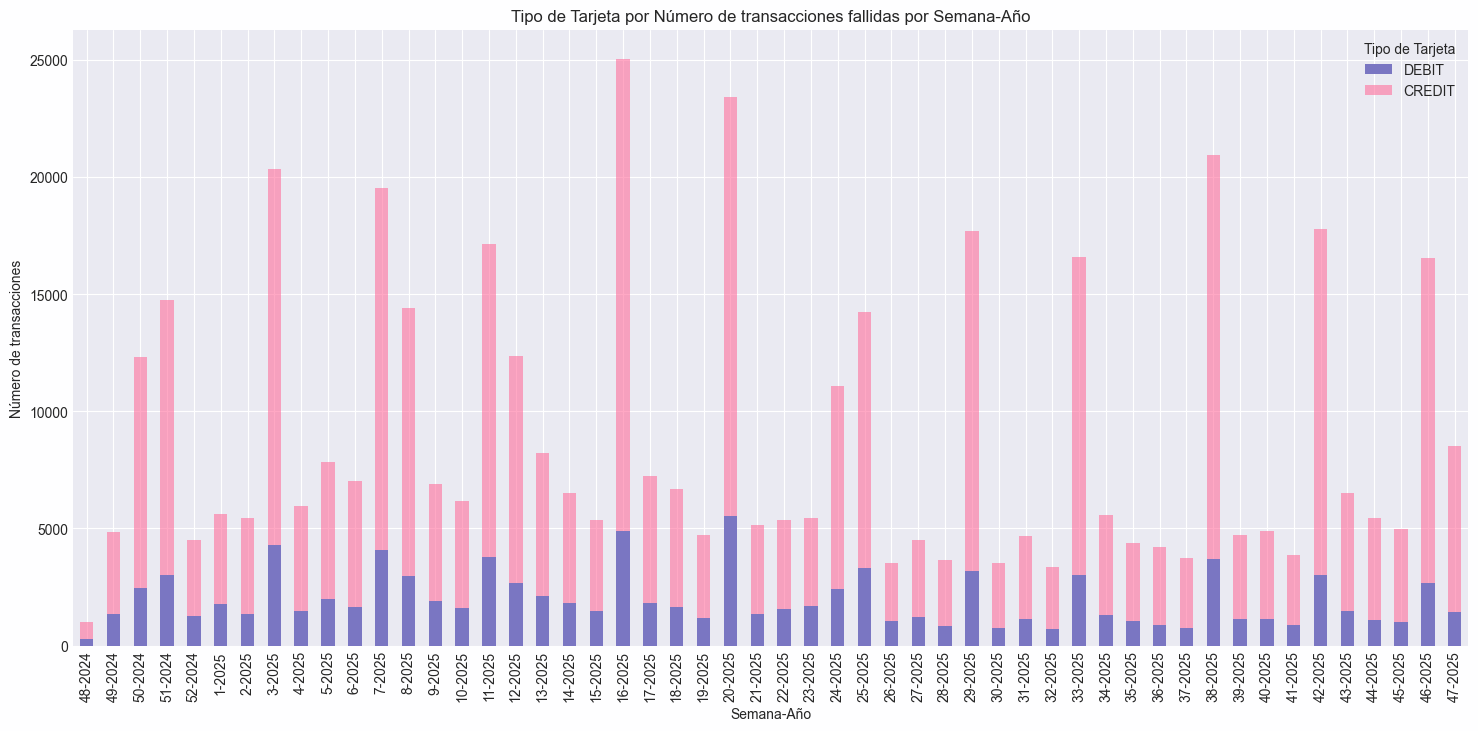

In [164]:
# grafica apilada por tipo de tarjeta y numero de intentos
data = card_type_sorted[['DEBIT', 'CREDIT']]
plt.figure(figsize=(18, 8))
data.plot(kind='bar', stacked=True, figsize=(18, 8))
plt.title('Tipo de Tarjeta por Número de transacciones fallidas por Semana-Año')
plt.legend(title='Tipo de Tarjeta')
plt.xlabel('Semana-Año')
plt.ylabel('Número de transacciones')
plt.show()

<Figure size 1800x800 with 0 Axes>

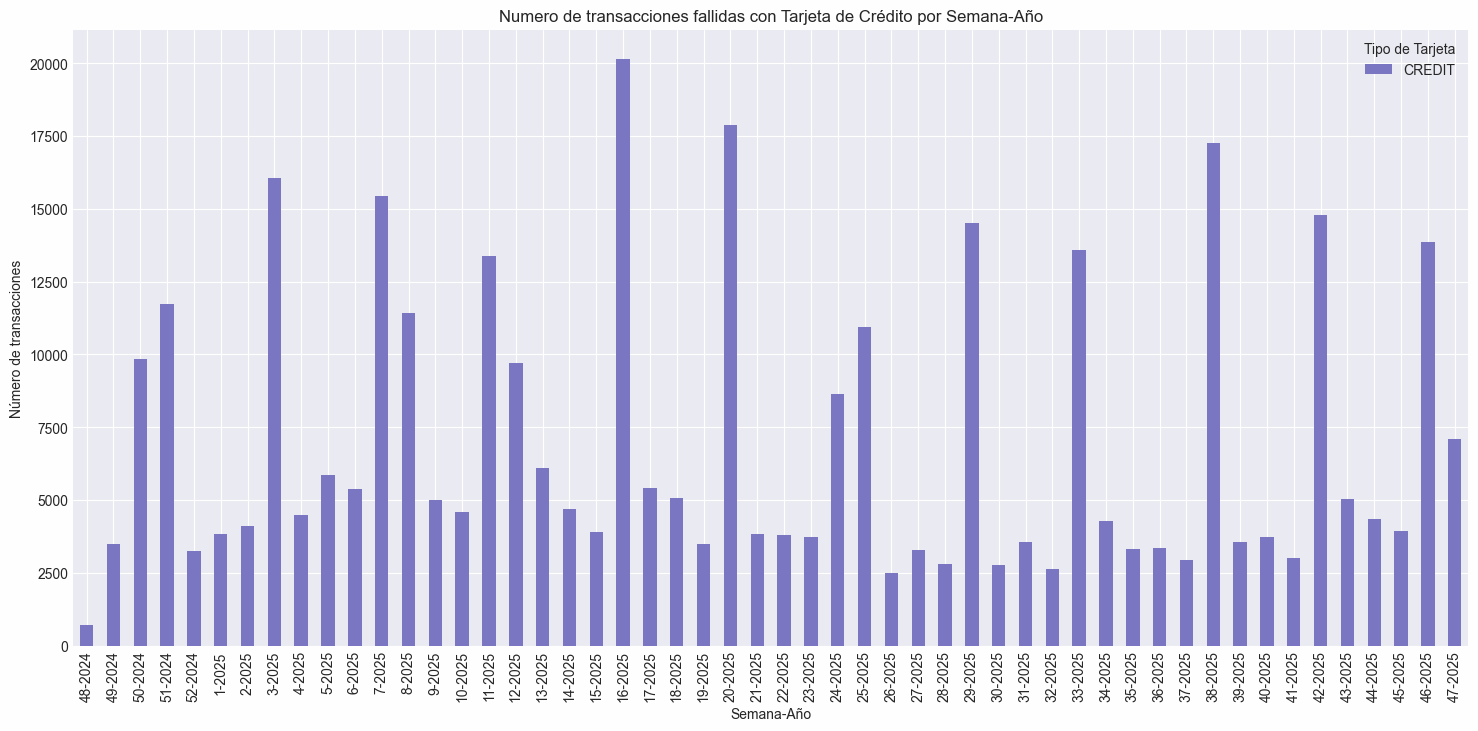

In [172]:
data = card_type_sorted[['CREDIT']]
plt.figure(figsize=(18, 8))
data.plot(kind='bar', stacked=True, figsize=(18, 8))
plt.title('Numero de transacciones fallidas con Tarjeta de Crédito por Semana-Año')
plt.legend(title='Tipo de Tarjeta')
plt.xlabel('Semana-Año')
plt.ylabel('Número de transacciones')
plt.show()

<Figure size 1800x800 with 0 Axes>

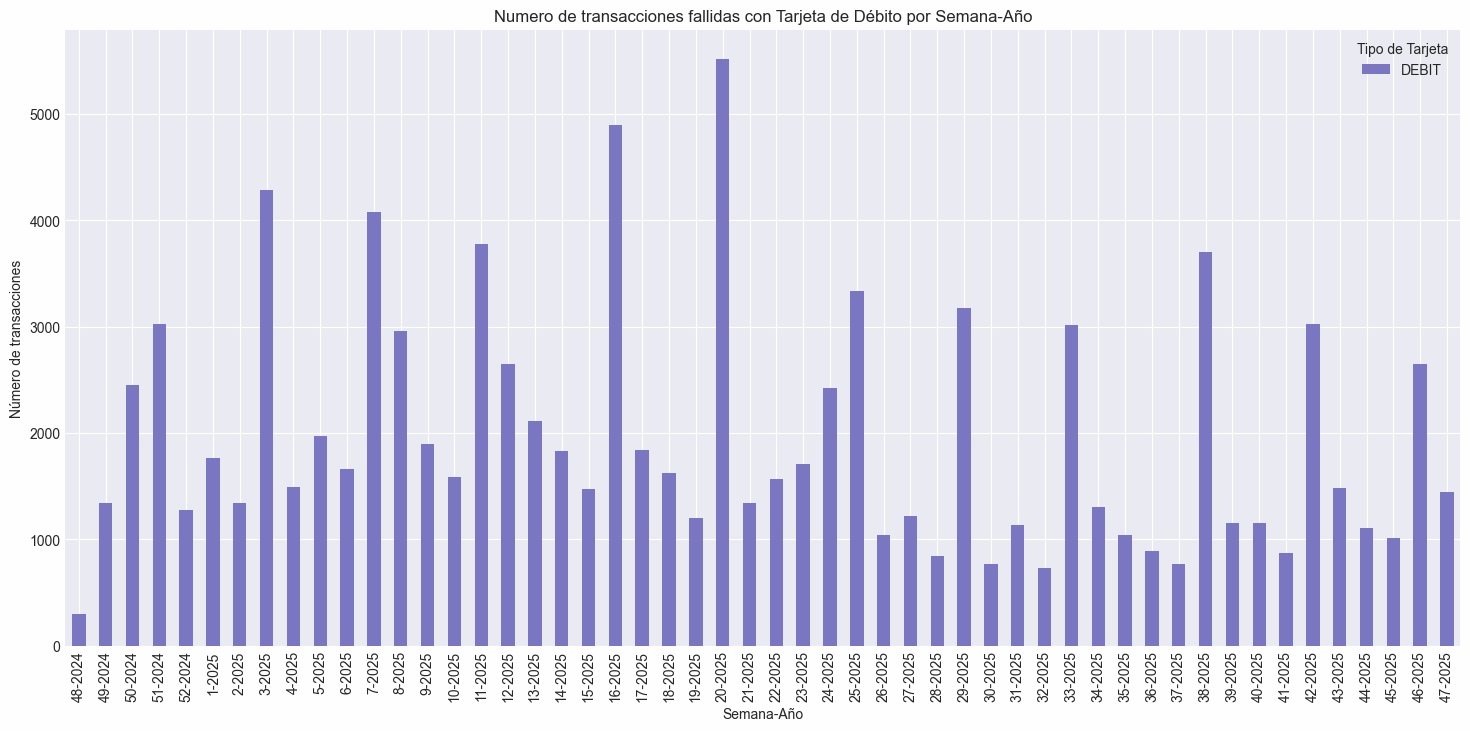

In [173]:
data = card_type_sorted[['DEBIT']]
plt.figure(figsize=(18, 8))
data.plot(kind='bar', stacked=True, figsize=(18, 8))
plt.title('Numero de transacciones fallidas con Tarjeta de Débito por Semana-Año')
plt.legend(title='Tipo de Tarjeta')
plt.xlabel('Semana-Año')
plt.ylabel('Número de transacciones')
plt.show()

In [174]:
df_fallidos.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano,intento_numero,etiqueta_intento,monto_real
925034,10017,2025-07-08 23:00:04.941000-06:00,2025-07-08 23:00:06.274000-06:00,2025-07-08 23:00:06.274000-06:00,cyb_cnp0007482290,5660000,None,cad6dc07-dae8-4dac-be3a-68f63093404f,520694,MEX,PLATINUM,DEBIT,UNAUTHORIZED_CARD,6.0,COMPLETO,210002.0,BANAMEX,CUENTA PRIORITY BANAMEX,PRIORITY,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,28,2025,2,28-2025,1,1,566.0


In [178]:
# convertir resultado pago a numero
df_fallidos['resultado_pago_num'] = df_fallidos['resultado_pago'].astype('category').cat.codes
df_fallidos['tipo_de_tarjeta_num'] = df_fallidos['tipo_de_tarjeta'].astype('category').cat.codes
df_fallidos.head(1)

C:\Users\victor.briones\AppData\Local\Temp\ipykernel_2700\2160967508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallidos['resultado_pago_num'] = df_fallidos['resultado_pago'].astype('category').cat.codes
C:\Users\victor.briones\AppData\Local\Temp\ipykernel_2700\2160967508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallidos['tipo_de_tarjeta_num'] = df_fallidos['tipo_de_tarjeta'].astype('category').cat.codes


,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_día,numero_semana_ano,intento_numero,etiqueta_intento,monto_real,resultado_pago_num,tipo_de_tarjeta_num
925034,10017,2025-07-08 23:00:04.941000-06:00,2025-07-08 23:00:06.274000-06:00,2025-07-08 23:00:06.274000-06:00,cyb_cnp0007482290,5660000,None,cad6dc07-dae8-4dac-be3a-68f63093404f,520694,MEX,PLATINUM,DEBIT,UNAUTHORIZED_CARD,6.0,COMPLETO,210002.0,BANAMEX,CUENTA PRIORITY BANAMEX,PRIORITY,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,28,2025,2,28-2025,1,1,566.0,1,0


In [181]:
df_fallidos['resultado_pago_num'].value_counts()

resultado_pago_num
1    463721
0       548
Name: count, dtype: int64

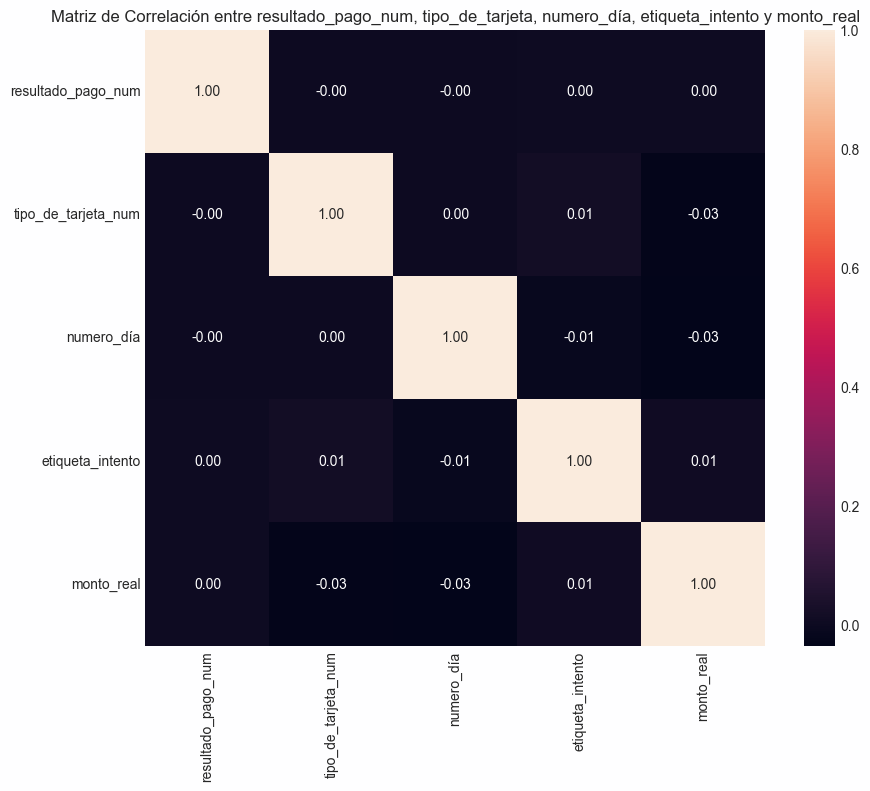

In [180]:
correlation_matrix = df_fallidos[['resultado_pago_num', 'tipo_de_tarjeta_num', 'numero_día', 'etiqueta_intento','monto_real']].corr()

# Visualización con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación entre resultado_pago_num, tipo_de_tarjeta, numero_día, etiqueta_intento y monto_real')
plt.show()

#### 